# Installing libraries

In [1]:
!pip install aif360
!pip install fairlearn
!pip install BlackBoxAuditing
!pip install adversarial-robustness-toolbox 
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 54.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=570baf2aff786986f3e5d4257d1192da00454c322e4516c855222f1a23938fc0
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into accou

# Pre-processing steps

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


In [3]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [4]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [5]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


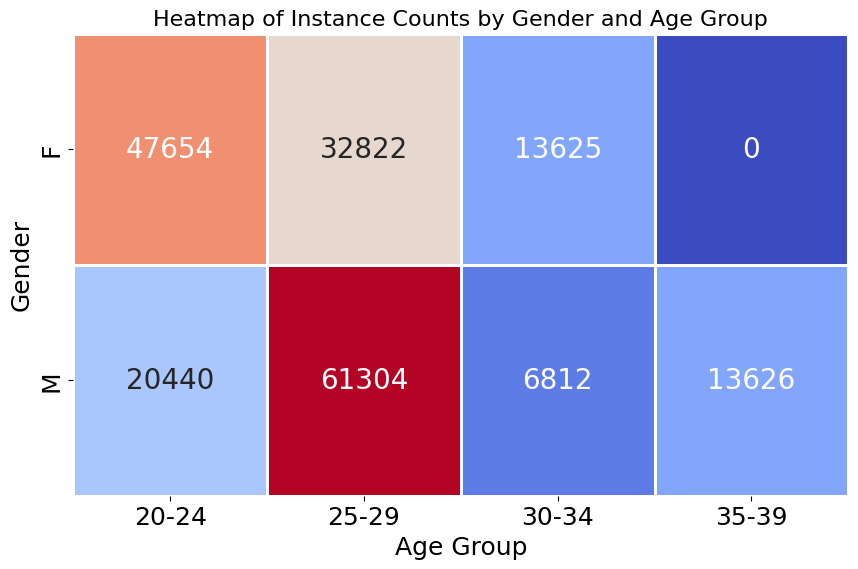


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

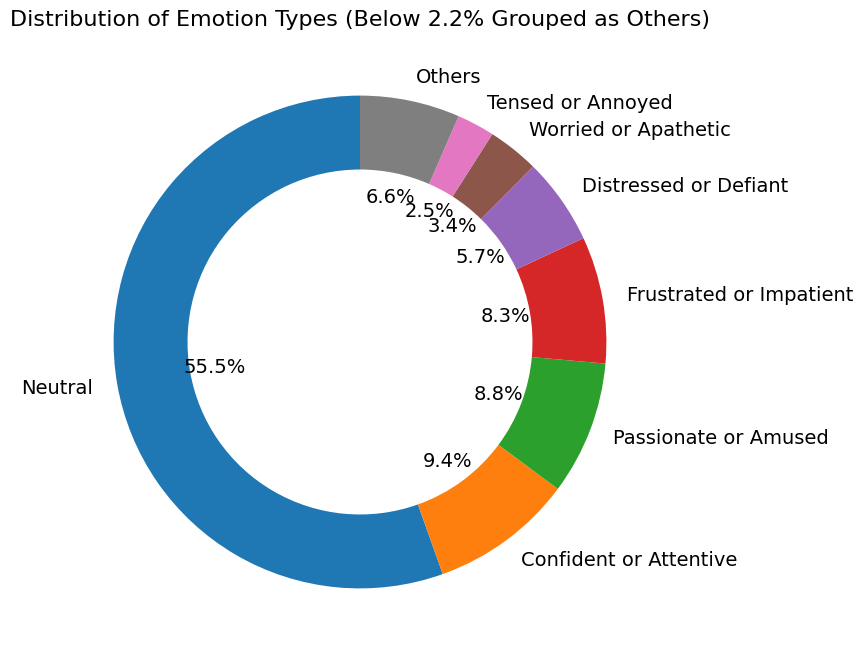


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

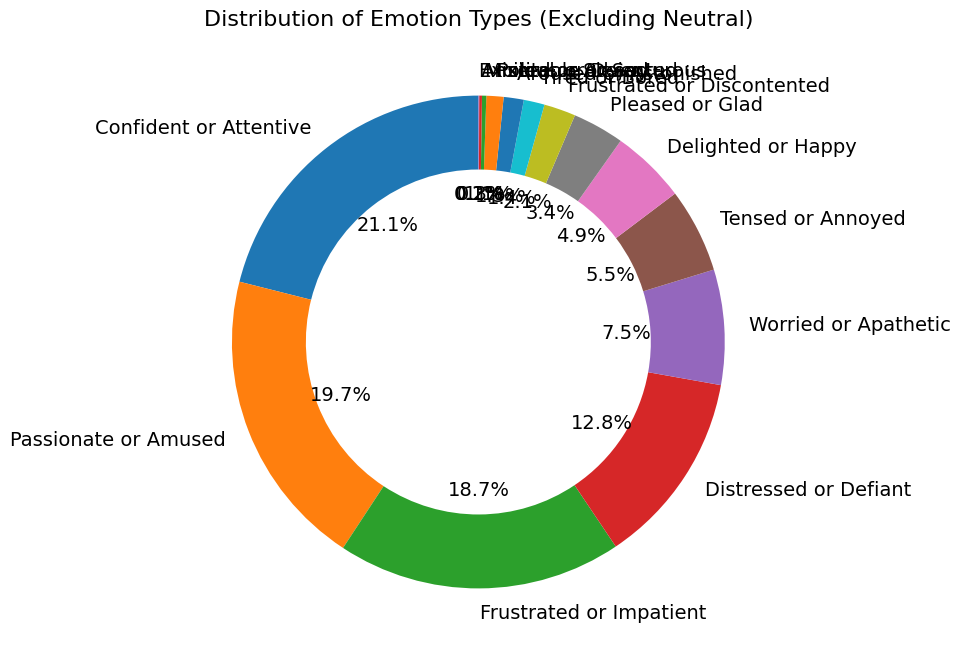


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


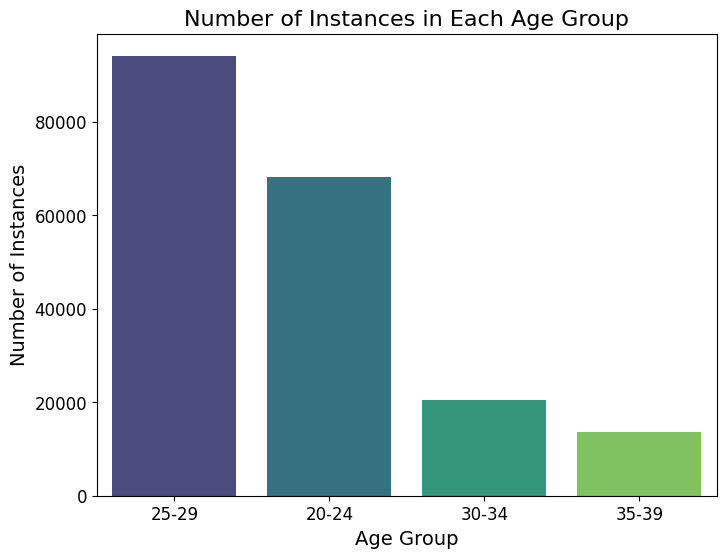


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


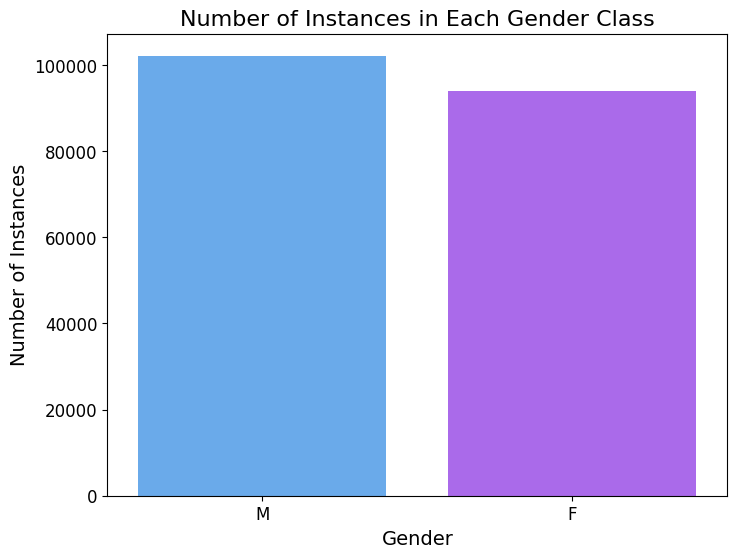

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 3629

Old Emotion Class Distribution (excluding neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



New Emotion Class Distribution (after ADASYN or SMOTE):
Counter({'Confident or Attentive': 18418, 'Passionate or Amused': 17212, 'Frustrated or Impatient': 16325, 'Distressed or Defiant': 11175, 'Worried or Apathetic': 6601, 'Tensed or Annoyed': 4845, 'Delighted or Happy': 4296, 'Frustrated or Discontented': 3792, 'Aroused or Astonished': 3748, 'Polite or Sleepy': 3690, 'Miserable or Sad': 3673, 'Excited or Adventurous': 3634, 'Anxious or Dejected': 3632, 'Neutral': 3629, 'Pleased or Glad': 3625, 'Tired or Bored': 3611})
Total Instances after balancing: 111906
       ecg        bvp        gsr        rsp        skt  emg_coru  emg_trap  \
0  0.84276  36.642044  13.144776  31.830358  27.615487   5.60425   6.59000   
1  0.83618  35.625009  12.510024  31.946496  27.604987   6.46675   7.37025   
2  0.82962  36.961677  15.502440  33.214519  24.909043   6.01500  13.65375   
3  0.80662  36.322411  32.487048  41.345244  25.624222   5.64550  15.29650   
4  0.65876  35.363512  43.845696  46.87222

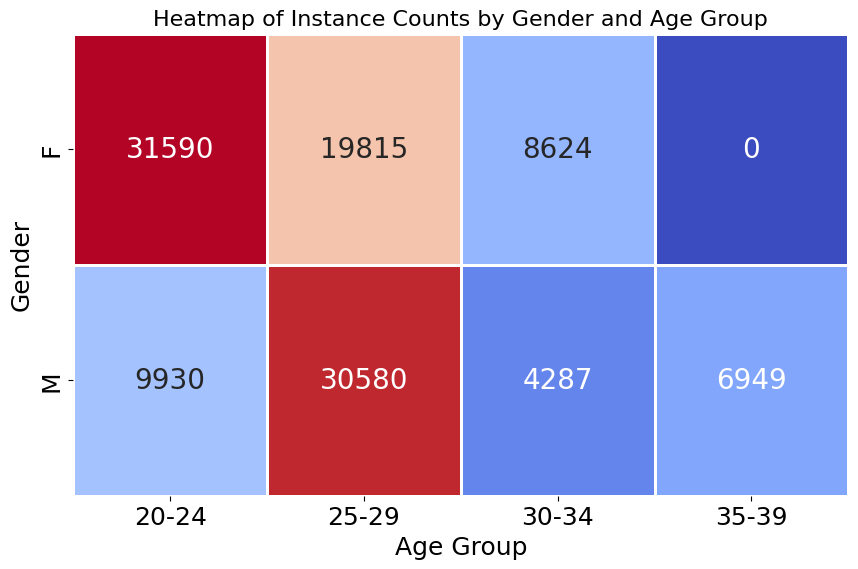


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Frustrated or Discontented     3792
Aroused or Astonished          3748
Polite or Sleepy               3690
Miserable or Sad               3673
Excited or Adventurous         3634
Anxious or Dejected            3632
Neutral                        3629
Pleased or Glad                3625
Tired or Bored                 3611
Name: count, dtype: int64
Total Instances in Emotion Distribution: 111906
Percentages for each class:
Emotion
Confident or Attentive        16.458456
Passionate or Amused          15.380766
Frustrated or Impatient       14.588136
Distressed or Defiant          9.986060
Worried or Apathetic           5.898701
Tensed or Annoyed              4.329527
Delighted or Happy             

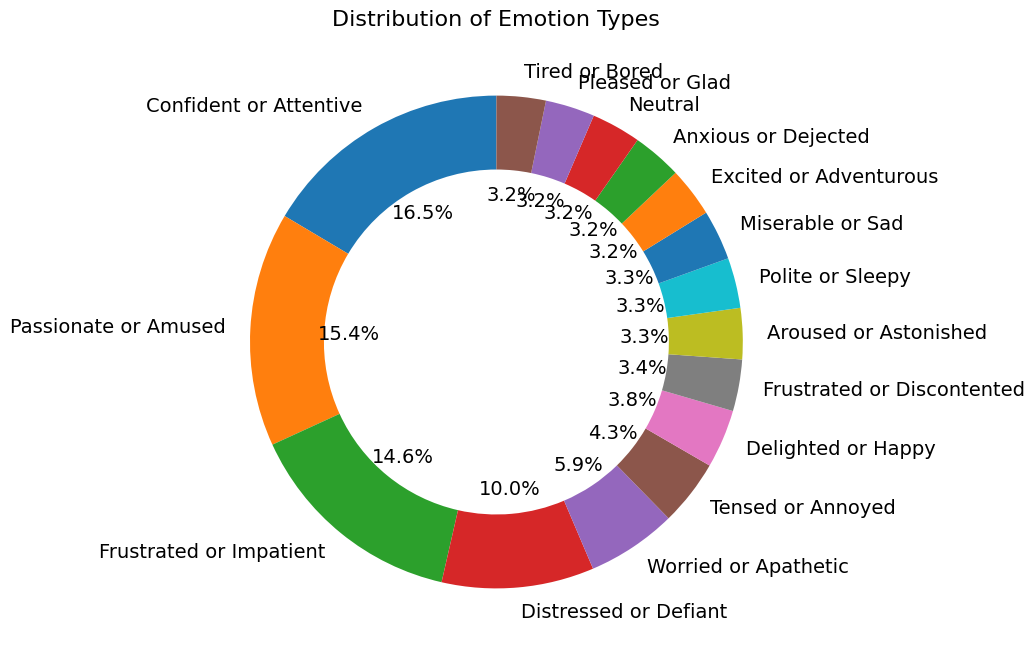


Age Group Distribution Information:
AGE
25-29    50399
20-24    41529
30-34    12911
35-39     6949
Name: count, dtype: int64
Total Instances in Age Group Distribution: 111788

Old vs New Age Group Counts (excluding Neutral):
25-29: Old=94126, New=50399, Difference=-43727
20-24: Old=68094, New=41529, Difference=-26565
30-34: Old=20437, New=12911, Difference=-7526
35-39: Old=13626, New=6949, Difference=-6677


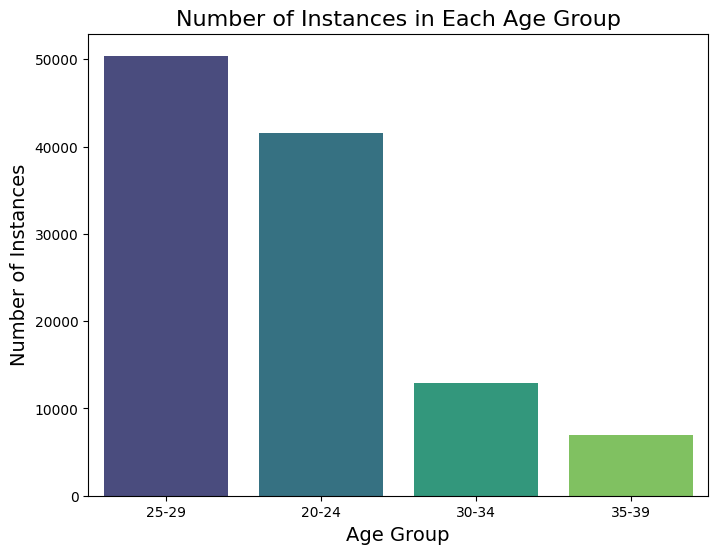


Gender Distribution Information:
GENDER
F    60069
M    51746
Name: count, dtype: int64
Total Instances in Gender Distribution: 111815

Old vs New Gender Class Counts (excluding Neutral):
M: Old=102182, New=51746, Difference=-50436
F: Old=94101, New=60069, Difference=-34032


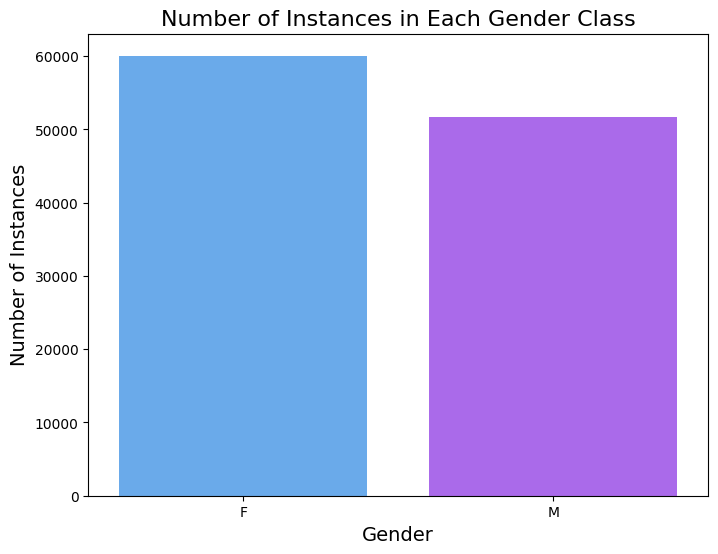

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    # Create a copy of the data to avoid modifying the original data
    df = data.copy()
    
    # Separate neutral emotion data from other emotions
    neutral_mask = df['Emotion'] == 'Neutral'
    df_neutral = df[neutral_mask]
    df_others = df[~neutral_mask]
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    # Print old number of instances per class (excluding neutral instances)
    print("\nOld Emotion Class Distribution (excluding neutral):")
    emotion_counts_excluding_neutral = emotion_counts.drop('Neutral', errors='ignore')
    print(emotion_counts_excluding_neutral)
    print(f"Total Instances before balancing: {emotion_counts_excluding_neutral.sum()}")

    # Undersample neutral class to target size
    if len(df_neutral) > target_size:
        neutral_indices = np.random.choice(df_neutral.index, target_size, replace=False)
        df_neutral_balanced = df_neutral.loc[neutral_indices]
    else:
        df_neutral_balanced = df_neutral
    
    # Prepare the data for resampling
    df_combined = pd.concat([df_neutral_balanced, df_others])
    X = df_combined.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df_combined['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        # Print new number of instances after balancing
        print("\nNew Emotion Class Distribution (after ADASYN or SMOTE):")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    print(df_resampled.head())
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    # 1. Heatmap for Gender and Age Distribution
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data
    
    # Print differences (excluding neutral)
    old_heatmap_data = old_data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    old_heatmap_data_excluding_neutral = old_heatmap_data.drop('Neutral', errors='ignore')
    print("\nOld vs New Heatmap Data (excluding Neutral):")
    print(old_heatmap_data_excluding_neutral.sum().sum(), " (Old) vs", heatmap_data.sum().sum(), " (New)")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

    # 2. Donut Chart for Emotion Distribution
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")  # Total instances in emotion data
    print("Percentages for each class:")
    print(emotion_percentages)
    
    # Print the difference in Emotion Classes (excluding Neutral)
    old_emotion_counts = old_data['Emotion'].value_counts()
    old_emotion_counts_excluding_neutral = old_emotion_counts.drop('Neutral', errors='ignore')
    print(f"Old Emotion Instances (excluding Neutral): {old_emotion_counts_excluding_neutral}")
    
    # Ignore neutral instances in old data count for diff calculation
    print("\nOld vs New Emotion Class Counts (excluding Neutral):")
    for emotion in old_emotion_counts_excluding_neutral.index:
        old_count = old_emotion_counts_excluding_neutral[emotion]
        new_count = emotion_counts.get(emotion, 0)
        diff = new_count - old_count
        print(f"{emotion}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()

    # 3. Bar Plot for Age Group Distribution
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")  # Total instances in age groups
    
    # Print differences in age groups (excluding neutral)
    old_age_counts = old_data['AGE'].value_counts()
    old_age_counts_excluding_neutral = old_age_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Age Group Counts (excluding Neutral):")
    for age_group in old_age_counts_excluding_neutral.index:
        old_count = old_age_counts_excluding_neutral[age_group]
        new_count = age_counts.get(age_group, 0)
        diff = new_count - old_count
        print(f"{age_group}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=age_counts.index,
        y=age_counts.values,
        palette='viridis'
    )
    plt.title('Number of Instances in Each Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

    # 4. Bar Plot for Gender Distribution
    print("\nGender Distribution Information:")
    gender_counts = data['GENDER'].value_counts()
    print(gender_counts)
    print(f"Total Instances in Gender Distribution: {gender_counts.sum()}")  # Total instances in gender classes
    
    # Print differences in gender classes (excluding neutral)
    old_gender_counts = old_data['GENDER'].value_counts()
    old_gender_counts_excluding_neutral = old_gender_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Gender Class Counts (excluding Neutral):")
    for gender in old_gender_counts_excluding_neutral.index:
        old_count = old_gender_counts_excluding_neutral[gender]
        new_count = gender_counts.get(gender, 0)
        diff = new_count - old_count
        print(f"{gender}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=gender_counts.index,
        y=gender_counts.values,
        palette='cool'
    )
    plt.title('Number of Instances in Each Gender Class', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

# Example workflow (replace 'data' with your dataset)
# data = pd.read_csv("your_dataset.csv")
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)


In [8]:
print(len(balanced_data))
df = balanced_data
df['AGE'] = df['AGE'].replace({'20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39'})
protected_attribute_names = ['AGE', 'GENDER']
df['AGE'] = df['AGE'].map({"20-29": 0, "30-39": 1})
df['GENDER'] = df['GENDER'].map({"F": 0, "M": 1})
emotion_labels = [
    'Neutral', 'Frustrated or Impatient', 'Tensed or Annoyed', 'Distressed or Defiant', 
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy', 
    'Worried or Apathetic', 'Frustrated or Discontented', 'Aroused or Astonished', 'Miserable or Sad', 
    'Anxious or Dejected', 'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'
]
label_to_num = {label: num for num, label in enumerate(emotion_labels)}
print("Emotion Labels and Corresponding Encodings:")
print(label_to_num)
df['Emotion'] = df['Emotion'].replace(label_to_num)
emotion_type_map = {'Positive': 1, 'Negative': 0}
df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


111906
Emotion Labels and Corresponding Encodings:
{'Neutral': 0, 'Frustrated or Impatient': 1, 'Tensed or Annoyed': 2, 'Distressed or Defiant': 3, 'Confident or Attentive': 4, 'Passionate or Amused': 5, 'Pleased or Glad': 6, 'Delighted or Happy': 7, 'Worried or Apathetic': 8, 'Frustrated or Discontented': 9, 'Aroused or Astonished': 10, 'Miserable or Sad': 11, 'Anxious or Dejected': 12, 'Tired or Bored': 13, 'Polite or Sleepy': 14, 'Excited or Adventurous': 15}


<ipython-input-8-178a9ea29ff1>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion'] = df['Emotion'].replace(label_to_num)
<ipython-input-8-178a9ea29ff1>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


In [9]:
# Define label and protected attributes
label_names = ['Emotion_Type']

# Drop missing values
df = df.dropna()

In [10]:
import tensorflow as tf

# Fair AI (AIF360) - Preprocessing Algorithms

In [11]:
import numpy as np
import pandas as pd
from aif360.algorithms.postprocessing import EqOddsPostprocessing, CalibratedEqOddsPostprocessing, RejectOptionClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization,SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
import time as time
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from aif360.metrics import ClassificationMetric
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import gc
import pandas as pd
from sklearn.model_selection import train_test_split
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization

positive_emotion_numbers = [0.0, 4.0, 5.0, 6.0, 7.0, 10.0, 14.0, 15.0]

# Gated Recurrent Unit

In [12]:
protected_attribute_configs = [
    {
        "desc" : "GENDER Mitigation",
        "protected_attribute_names": ["GENDER"],
        "privileged_protected_attributes": [{"GENDER": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1}],
        "sensitive_attribute": "GENDER"
    },
    {
        "desc" : "AGE Mitigation",
        "protected_attribute_names": ["AGE"],
        "privileged_protected_attributes": [{"AGE": 0}],
        "unprivileged_protected_attributes": [{"AGE": 1}],
        "sensitive_attribute": "AGE"
    },
    {
        
        "desc" : "AGE&GENDER Mitigation",
        "protected_attribute_names": ["GENDER", "AGE"],
        "privileged_protected_attributes": [{"GENDER": 0, "AGE": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1, "AGE": 1}],
        "sensitive_attribute": "GENDER"
    }
]

fairness_results = pd.DataFrame({
    "Description": ["Ideal Values"],  # Start with the Ideal Values row
    "Base Rate": 'N/A',  # Ideal value
    "Selection Rate": 'N/A',  # Ideal value
    "Disparate Impact": [1.0],  # Ideal value
    "Statistical Parity Difference": [0.0],  # Ideal value
    "Between Group Coefficient of Variation": [0.0],  # Ideal value
    "Between Group Generalized Entropy Index": [0.0],  # Ideal value
    "Between Group Theil Index": [0.0],  # Ideal value
    "Mean Difference": [0.0],  # Ideal value
    "Smoothed Empirical Differential Fairness": [0.0],  # Ideal value
    "Consistency": [1.0]
})

for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]
    
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=label_names,
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    
    def build_gru_model(input_shape, num_classes):
        model = Sequential()
        model.add(GRU(128, return_sequences=True, input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(64, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(32))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(num_classes, activation='softmax'))
        
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
        
        return model
    
    # Load data
    X = df.drop(columns=['Emotion'])
    y = df['Emotion']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    input_shape = (X_train.shape[1], 1)
    num_classes = len(y.unique())
    
    def get_lr_scheduler():
        return ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_delta=0.0001, cooldown=1, verbose=1, min_lr=1e-6)
    
    lr_scheduler = get_lr_scheduler()
    
    # Build and train model
    gru_model = build_gru_model(input_shape, num_classes)
    gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])
    
    predictions = gru_model.predict(X_test)
    predicted_labels = predictions.argmax(axis=1)
    
    pred_df = X_test.copy()
    pred_df['Emotion'] = predicted_labels
    pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    y_pred = pred_df['Emotion'].values
    pred_df.drop(columns=['Emotion'], inplace=True)
    
    test_df = X_test.copy()
    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    def compute_fairness_metrics(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
        global fairness_results
        
        metrics = ClassificationMetric(
            original_dataset,
            classified_dataset,
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups
        )
        consistency_value = metrics.consistency()
        if isinstance(consistency_value, (np.ndarray, list)):
            consistency_value = np.mean(consistency_value)
        
        fairness_metrics = {
            "Description": description,
            "Base Rate": metrics.base_rate(),
            "Selection Rate": metrics.selection_rate(),
            "Disparate Impact": metrics.disparate_impact(),
            "Statistical Parity Difference": metrics.statistical_parity_difference(),
            "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
            "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
            "Between Group Theil Index": metrics.between_group_theil_index(),
            "Mean Difference": metrics.mean_difference(),
            "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
            "Consistency": consistency_value
        }
        
        fairness_metrics_df = pd.DataFrame([fairness_metrics])
        fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)
        
        for key, value in fairness_metrics.items():
            if key != "Description":
                if isinstance(value, (np.ndarray, list)):
                    value = np.mean(value)
                print(f"  {key}: {value:.4f}")
        
        return metrics
    
    compute_fairness_metrics(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU model {desc}")

    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)


    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    train_dir, test_dir = dir_processed.split([0.8], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    
    train_dir_df = train_dir.convert_to_dataframe()[0]
    test_dir_df = test_dir.convert_to_dataframe()[0]
    train_reweighed_df = train_reweighed.convert_to_dataframe()[0]
    test_reweighed_df = test_reweighed.convert_to_dataframe()[0]
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_gru(dataset, weights):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        features_reshaped = np.expand_dims(features.values, axis=2)
        return features_reshaped, labels, weights
    
    X_train_dir, y_train_dir, train_weights_dir = prepare_data_for_gru(train_dir_df, dir_weights)
    X_test_dir, y_test_dir, _ = prepare_data_for_gru(test_dir_df, dir_weights)
    
    X_train_reweighed, y_train_reweighed, train_weights_rw = prepare_data_for_gru(train_reweighed_df, rw_weights)
    X_test_reweighed, y_test_reweighed, _ = prepare_data_for_gru(test_reweighed_df, rw_weights)
    
    gru_dir = build_gru_model(X_train_dir.shape[1:], 16)
    gru_dir.fit(X_train_dir, y_train_dir, epochs=5, batch_size=128, sample_weight=train_weights_dir, validation_data=(X_test_dir, y_test_dir))
    
    y_pred_dir = np.argmax(gru_dir.predict(X_test_dir), axis=1)
    
    gru_reweighed = build_gru_model(X_train_reweighed.shape[1:],16)
    gru_reweighed.fit(X_train_reweighed, y_train_reweighed, epochs=5, batch_size=128, sample_weight=train_weights_rw, validation_data=(X_test_reweighed, y_test_reweighed))
    
    y_pred_reweighed = np.argmax(gru_reweighed.predict(X_test_reweighed), axis=1)
    
    pred_reweighed_df = test_reweighed_df.copy()
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_dir_df = test_dir_df.copy()
    pred_dir_df['Emotion'] = y_pred_dir
    
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=test_dir.protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=test_reweighed.protected_attribute_names)
    
    compute_fairness_metrics(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"DIR model {desc}")
    compute_fairness_metrics(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"Reweighed model {desc}")
    # Store results
    fairness_results.to_csv('fairness_metrics.csv', index=False)


Creating BinaryLabelDataset...
BinaryLabelDataset created.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3097 - loss: 2.1850 - val_accuracy: 0.7143 - val_loss: 0.7845 - learning_rate: 0.0010
Epoch 2/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6689 - loss: 0.9239 - val_accuracy: 0.7619 - val_loss: 0.6374 - learning_rate: 0.0010
Epoch 3/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7440 - loss: 0.7254 - val_accuracy: 0.8134 - val_loss: 0.5001 - learning_rate: 0.0010
Epoch 4/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7764 - loss: 0.6357 - val_accuracy: 0.8249 - val_loss: 0.4644 - learning_rate: 0.0010
Epoch 5/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7986 - loss: 0.5737 - val_accuracy: 0.8450 - val_loss: 0.4265 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Base Rate: 0.5272
  Selection Rate: 0.5272
  Disparate Impact: 1.2767
  Statistical Parity Difference: 0.1292
  Between Gro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2076 - loss: 2.6443 - val_accuracy: 0.4221 - val_loss: 1.6551
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5069 - loss: 1.4619 - val_accuracy: 0.6831 - val_loss: 0.9225
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6207 - loss: 1.1148 - val_accuracy: 0.7308 - val_loss: 0.7444
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6712 - loss: 0.9617 - val_accuracy: 0.7635 - val_loss: 0.6786
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7093 - loss: 0.8501 - val_accuracy: 0.7834 - val_loss: 0.6030
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2012 - loss: 2.6465 - val_accuracy: 0.4727 - val_loss: 1.6088
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5076 - loss: 1.4512 - val_accuracy: 0.6777 - val_loss: 0.9601
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6130 - loss: 1.1206 - val_accuracy: 0.7222 - val_loss: 0.7973
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6646 - loss: 0.9679 - val_accuracy: 0.7634 - val_loss: 0.6856
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7013 - loss: 0.8622 - val_accuracy: 0.7480 - val_loss: 0.6913
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Base Rate: 0.5207
  Selection Rate: 0.5155
  Disparate Impact: 1.3523
  Statistical Parity Difference: 0.1562
  Between Group Coefficient of Variation: 0.0155
  Between Group Generalized Entropy Index: 0.0001
  Between Group Theil Index: 0.0001
  Mean Difference: 0.1562
  Smoothed Empirical Differential Fairness: 0.2656
  Co

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3076 - loss: 2.1618 - val_accuracy: 0.7102 - val_loss: 0.7812 - learning_rate: 0.0010
Epoch 2/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6677 - loss: 0.9157 - val_accuracy: 0.7783 - val_loss: 0.6071 - learning_rate: 0.0010
Epoch 3/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7453 - loss: 0.7144 - val_accuracy: 0.7158 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 4/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7817 - loss: 0.6231 - val_accuracy: 0.8378 - val_loss: 0.4458 - learning_rate: 0.0010
Epoch 5/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8043 - loss: 0.5617 - val_accuracy: 0.8258 - val_loss: 0.4652 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Base Rate: 0.5272
  Selection Rate: 0.5272
  Disparate Impact: 1.0042
  Statistical Parity Difference: 0.0022
  Between Gro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1955 - loss: 2.6663 - val_accuracy: 0.5214 - val_loss: 1.4276
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4895 - loss: 1.5197 - val_accuracy: 0.6416 - val_loss: 1.0427
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6017 - loss: 1.1728 - val_accuracy: 0.7093 - val_loss: 0.8581
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6599 - loss: 0.9979 - val_accuracy: 0.7472 - val_loss: 0.7377
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6962 - loss: 0.8901 - val_accuracy: 0.7455 - val_loss: 0.6989
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1920 - loss: 2.7069 - val_accuracy: 0.5161 - val_loss: 1.4732
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5089 - loss: 1.4882 - val_accuracy: 0.6749 - val_loss: 0.9450
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6159 - loss: 1.1419 - val_accuracy: 0.5745 - val_loss: 1.2694
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6722 - loss: 0.9670 - val_accuracy: 0.6994 - val_loss: 0.8450
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7033 - loss: 0.8600 - val_accuracy: 0.7737 - val_loss: 0.6261
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Base Rate: 0.5231
  Selection Rate: 0.5197
  Disparate Impact: 1.0034
  Statistical Parity Difference: 0.0018
  Between Group Coefficient of Variation: 0.0049
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.0018
  Smoothed Empirical Differential Fairness: 0.0228
  Co

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3090 - loss: 2.1887 - val_accuracy: 0.7121 - val_loss: 0.7814 - learning_rate: 0.0010
Epoch 2/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6659 - loss: 0.9213 - val_accuracy: 0.7765 - val_loss: 0.5944 - learning_rate: 0.0010
Epoch 3/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7399 - loss: 0.7265 - val_accuracy: 0.8194 - val_loss: 0.4831 - learning_rate: 0.0010
Epoch 4/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7821 - loss: 0.6149 - val_accuracy: 0.8391 - val_loss: 0.4347 - learning_rate: 0.0010
Epoch 5/5
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8005 - loss: 0.5639 - val_accuracy: 0.8439 - val_loss: 0.4355 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Base Rate: 0.5272
  Selection Rate: 0.5272
  Disparate Impact: 1.3814
  Statistical Parity Difference: 0.1864
  Between Group Coeffic

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1955 - loss: 2.6719 - val_accuracy: 0.4830 - val_loss: 1.5060
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5013 - loss: 1.4892 - val_accuracy: 0.6747 - val_loss: 0.9429
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6190 - loss: 1.1198 - val_accuracy: 0.7400 - val_loss: 0.7501
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6775 - loss: 0.9461 - val_accuracy: 0.7606 - val_loss: 0.6813
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7060 - loss: 0.8579 - val_accuracy: 0.7645 - val_loss: 0.6577
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1924 - loss: 2.6861 - val_accuracy: 0.4972 - val_loss: 1.5254
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4941 - loss: 1.5122 - val_accuracy: 0.6660 - val_loss: 0.9668
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6078 - loss: 1.1524 - val_accuracy: 0.7237 - val_loss: 0.7949
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6682 - loss: 0.9737 - val_accuracy: 0.7595 - val_loss: 0.6813
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7025 - loss: 0.8640 - val_accuracy: 0.7861 - val_loss: 0.6086
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Base Rate: 0.5189
  Selection Rate: 0.5354
  Disparate Impact: 1.4877
  Statistical Parity Difference: 0.2316
  Between Group Coefficient of Variation: 0.8902
  Between Group Generalized Entropy Index: 0.3962
  Between Group Theil Index: 0.5834
  Mean Difference: 0.2316
  Smoothed Empirical Differential Fairness: 0.6570
  Co

In [13]:
fairness_results

,Description,Base Rate,Selection Rate,Disparate Impact,Statistical Parity Difference,Between Group Coefficient of Variation,Between Group Generalized Entropy Index,Between Group Theil Index,Mean Difference,Smoothed Empirical Differential Fairness,Consistency
0,Ideal Values,N/A,N/A,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
1,GRU model GENDER Mitigation,0.52722,0.52722,1.276716,0.129248,0.000000,0.000000e+00,0.000000e+00,0.129248,0.277741,0.955643
2,DIR model GENDER Mitigation,0.520689,0.515545,1.352253,0.156235,0.015516,1.203678e-04,1.202752e-04,0.156235,0.265573,0.955795
3,Reweighed model GENDER Mitigation,0.519079,0.534422,1.226979,0.109858,0.003574,6.386123e-06,6.387390e-06,0.109858,0.247261,0.954104
4,GRU model AGE Mitigation,0.52722,0.52722,1.004233,0.002230,0.000000,0.000000e+00,0.000000e+00,0.002230,0.004712,0.955643
5,DIR model AGE Mitigation,0.523104,0.519705,1.003441,0.001787,0.004876,1.188790e-05,1.185527e-05,0.001787,0.022823,0.952870
6,Reweighed model AGE Mitigation,0.519079,0.544084,0.989321,-0.005821,0.000433,9.359863e-08,9.357606e-08,-0.005821,0.014446,0.954024
7,GRU model AGE&GENDER Mitigation,0.52722,0.52722,1.381449,0.186383,0.889935,3.959920e-01,5.833234e-01,0.186383,0.709900,0.955643
8,DIR model AGE&GENDER Mitigation,0.5189,0.535361,1.487665,0.231592,0.890165,3.961973e-01,5.833557e-01,0.231592,0.656959,0.956305
9,Reweighed model AGE&GENDER Mitigation,0.524491,0.537732,1.367926,0.180647,0.898686,4.038186e-01,5.920195e-01,0.180647,0.669609,0.955992
